# **Importing Libraries**

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 7.6 MB/s eta 0:00:00


In [ ]:
import warnings 
warnings.filterwarnings('ignore')

#--------------------DATA MANIPULATION-------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#---------------------DATA VISUALIZATION-----------------------

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#--------------------MODEL IMPLEMENTATION-----------------------
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

#---------------------MODEL EVALUATION--------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


# **Loading Data**

In [ ]:
#Reading Data after loading the training and testing files into Colab Env
#Reading the column names from metadata file- This csv file has been created externally using the metadata.txt provided
df_metadata = pd.read_csv('metadata.csv') 
cols = df_metadata['Columns'].tolist()

df_train = pd.read_csv('census_income_learn.csv', names=cols, header=None)
df_test = pd.read_csv('census_income_test.csv' , names=cols, header=None)

**Exploring Data**

In [ ]:
#Previewing Training Data
df_train.head().T

0  \
age                                                                                73   
class of worker                                                       Not in universe   
detailed industry recode                                                            0   
detailed occupation recode                                                          0   
education                                                        High school graduate   
wage per hour                                                                       0   
enroll in edu inst last wk                                            Not in universe   
marital stat                                                                  Widowed   
major industry code                                       Not in universe or children   
major occupation code                                                 Not in universe   
race                                                                            White   
hispanic origin                                                             All other   
sex                                                                            Female   
member of a labor union                                               Not in universe   
reason for unemployment                                               Not in universe   
full or part time employment stat                                  Not in labor force   
capital gains                                                                       0   
capital losses                                                                      0   
dividends from stocks                                                               0   
tax filer stat                                                               Nonfiler   
region of previous residence                                          Not in universe   
state of previous residence                                           Not in universe   
detailed household and family stat           Other Rel 18+ ever marr not in subfamily   
detailed household summary in household                 Other relative of householder   
instance weight                                                               1700.09   
migration code-change in msa                                                        ?   
migration code-change in reg                                                        ?   
migration code-move within reg                                                      ?   
live in this house 1 year ago                        Not in universe under 1 year old   
migration prev res in sunbelt                                                       ?   
num persons worked for employer                                                     0   
family members under 18                                               Not in universe   
country of birth father                                                 United-States   
country of birth mother                                                 United-States   
country of birth self                                                   United-States   
citizenship                                         Native- Born in the United States   
own business or self employed                                                       0   
fill inc questionnaire for veteran's admin                            Not in universe   
veterans benefits                                                                   2   
weeks worked in year                                                                0   
year                                                                               95   
income                                                                       - 50000.   

                                                                               1  \
age                                                                           58   
class of worker                                   Self-employed-not incorporated   
deta

In [ ]:
#Previewing Testing Data
df_test.head().T

0  \
age                                                                             38   
class of worker                                                            Private   
detailed industry recode                                                         6   
detailed occupation recode                                                      36   
education                                                 1st 2nd 3rd or 4th grade   
wage per hour                                                                    0   
enroll in edu inst last wk                                         Not in universe   
marital stat                                       Married-civilian spouse present   
major industry code                                    Manufacturing-durable goods   
major occupation code                        Machine operators assmblrs & inspctrs   
race                                                                         White   
hispanic origin                                                 Mexican (Mexicano)   
sex                                                                         Female   
member of a labor union                                            Not in universe   
reason for unemployment                                            Not in universe   
full or part time employment stat                              Full-time schedules   
capital gains                                                                    0   
capital losses                                                                   0   
dividends from stocks                                                            0   
tax filer stat                                        Joint one under 65 & one 65+   
region of previous residence                                       Not in universe   
state of previous residence                                        Not in universe   
detailed household and family stat                           Spouse of householder   
detailed household summary in household                      Spouse of householder   
instance weight                                                            1032.38   
migration code-change in msa                                                     ?   
migration code-change in reg                                                     ?   
migration code-move within reg                                                   ?   
live in this house 1 year ago                     Not in universe under 1 year old   
migration prev res in sunbelt                                                    ?   
num persons worked for employer                                                  4   
family members under 18                                            Not in universe   
country of birth father                                                     Mexico   
country of birth mother                                                     Mexico   
country of birth self                                                       Mexico   
citizenship                                    Foreign born- Not a citizen of U S    
own business or self employed                                                    0   
fill inc questionnaire for veteran's admin                         Not in universe   
veterans benefits                                                                2   
weeks worked in year                                                            12   
year                                                                            95   
income                                                                    - 50000.   

                                                                               1  \
age                                                                           44   
class of worker                                   Self-employed-not incorporated   
detailed industry recode                                                      37   
detailed occupation recode                    

Observations: 

Both training and testing data files need to be cleaned since they contain ' ?' character which needs to be eliminated.*italicised text*

In [ ]:
#Examining Number of Records and Features in the given data
print(f'The shape of training data is {df_train.shape}')
print(f'The shape of testing data is {df_test.shape}')

The shape of training data is (199523, 42)
The shape of testing data is (99762, 42)


Observation: There are 199523 records and 42 features in training data whilst 99762 records and 42 features in testing data. 

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class of worker                             199523 non-null  object 
 2   detailed industry recode                    199523 non-null  int64  
 3   detailed occupation recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage per hour                               199523 non-null  int64  
 6   enroll in edu inst last wk                  199523 non-null  object 
 7   marital stat                                199523 non-null  object 
 8   major industry code                         199523 non-null  object 
 9   major occupation code                       199523 non-null  object 
 

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         99762 non-null  int64  
 1   class of worker                             99762 non-null  object 
 2   detailed industry recode                    99762 non-null  int64  
 3   detailed occupation recode                  99762 non-null  int64  
 4   education                                   99762 non-null  object 
 5   wage per hour                               99762 non-null  int64  
 6   enroll in edu inst last wk                  99762 non-null  object 
 7   marital stat                                99762 non-null  object 
 8   major industry code                         99762 non-null  object 
 9   major occupation code                       99762 non-null  object 
 10  race      

Observations:

The dataset does not contain any null value.

There are 13 numeric columns and 29 columns of object data type.



In [ ]:
#Displaying the statistical summary of the training dataset to gain deep insights about minimum value, mean, count
df_train.describe().T

count         mean          std    min  \
age                              199523.0    34.494199    22.310895   0.00   
detailed industry recode         199523.0    15.352320    18.067129   0.00   
detailed occupation recode       199523.0    11.306556    14.454204   0.00   
wage per hour                    199523.0    55.426908   274.896454   0.00   
capital gains                    199523.0   434.718990  4697.531280   0.00   
capital losses                   199523.0    37.313788   271.896428   0.00   
dividends from stocks            199523.0   197.529533  1984.163658   0.00   
instance weight                  199523.0  1740.380269   993.768156  37.87   
num persons worked for employer  199523.0     1.956180     2.365126   0.00   
own business or self employed    199523.0     0.175438     0.553694   0.00   
veterans benefits                199523.0     1.514833     0.851473   0.00   
weeks worked in year             199523.0    23.174897    24.411488   0.00   
year                             199523.0    94.499672     0.500001  94.00   

                                      25%      50%      75%      max  
age                                15.000    33.00    50.00     90.0  
detailed industry recode            0.000     0.00    33.00     51.0  
detailed occupation recode          0.000     0.00    26.00     46.0  
wage per hour                       0.000     0.00     0.00   9999.0  
capital gains                       0.000     0.00     0.00  99999.0  
capital losses                      0.000     0.00     0.00   4608.0  
dividends from stocks               0.000     0.00     0.00  99999.0  
instance weight                  1061.615  1618.31  2188.61  18656.3  
num persons worked for employer     0.000     1.00     4.00      6.0  
own business or self employed       0.000     0.00     0.00      2.0  
veterans benefits                   2.000     2.00     2.00      2.0  
weeks worked in year                0.000     8.00    52.00     52.0  
year                               94.000    94.00    95.00     95.0

**Observations:**

The dataset comprises of information about people aged between 0 and 90 years and the average age is 36 years. 

According to the given data, the minimum wage per hour for an individual is USD 0 and the maximum is $9999.


In [ ]:
df_test.describe().T

count         mean          std    min  \
age                              99762.0    34.628596    22.333449   0.00   
detailed industry recode         99762.0    15.332812    18.026709   0.00   
detailed occupation recode       99762.0    11.331118    14.459589   0.00   
wage per hour                    99762.0    54.461268   270.202643   0.00   
capital gains                    99762.0   425.788577  4616.795578   0.00   
capital losses                   99762.0    35.919458   265.525252   0.00   
dividends from stocks            99762.0   192.494727  1841.728492   0.00   
instance weight                  99762.0  1739.542838   994.900902  43.26   
num persons worked for employer  99762.0     1.956156     2.364331   0.00   
own business or self employed    99762.0     0.178505     0.558316   0.00   
veterans benefits                99762.0     1.519827     0.848229   0.00   
weeks worked in year             99762.0    23.185331    24.389184   0.00   
year                             99762.0    94.500652     0.500002  94.00   

                                     25%       50%        75%      max  
age                                16.00    33.000    50.0000     90.0  
detailed industry recode            0.00     0.000    33.0000     51.0  
detailed occupation recode          0.00     0.000    26.0000     46.0  
wage per hour                       0.00     0.000     0.0000   9900.0  
capital gains                       0.00     0.000     0.0000  99999.0  
capital losses                      0.00     0.000     0.0000   4608.0  
dividends from stocks               0.00     0.000     0.0000  99999.0  
instance weight                  1058.05  1615.395  2187.2775  16258.2  
num persons worked for employer     0.00     1.000     4.0000      6.0  
own business or self employed       0.00     0.000     0.0000      2.0  
veterans benefits                   2.00     2.000     2.0000      2.0  
weeks worked in year                0.00     8.000    52.0000     52.0  
year                               94.00    95.000    95.0000     95.0

In [ ]:
#Given in metadata to ignore these features
df_train.drop(['instance weight'], axis=1, inplace= True)
df_test.drop(['instance weight'], axis=1, inplace= True)

# **Data Scrubbing**

In this section data has been cleaned where all the duplicates and missing values are initially identified. Afterwards, Duplicates are dropped and missing values are imputed with Most frequently occuring values (Mode).

In [ ]:
for i in df_train.columns:
  print(df_train[i].unique()) 

[73 58 18  9 10 48 42 28 47 34  8 32 51 46 26 13 39 16 35 12 27 56 55  2
  1 37  4 63 25 81 11 30  7 66 84 52  5 36 72 61 41 90 49  6  0 33 57 50
 24 17 53 40 54 22 29 85 38 76 21 31 74 19 15  3 43 68 71 45 62 23 69 75
 44 59 60 64 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88]
[' Not in universe' ' Self-employed-not incorporated' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']
[ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5
 11  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21
 28 20 51 10]
[ 0 34 10  3 40 26 37 31 12 36 41 22  2 35 25 23 42  8 19 29 27 16 33 13
 18  9 17 39 32 11 30 38 20  7 21 44 24 43 28  4  1  6 45 14  5 15 46]
[' High school graduate' ' Some college but no degree' ' 10th grade'
 ' Children' ' Bachelors degree(BA AB BS)'
 ' Masters degree(MA MS MEng MEd MSW MBA)' ' Less than 1st grade'
 ' Associates degree-academic program' ' 7th and 

In [ ]:
for i in df_test.columns:
  print(df_test[i].unique())

[38 44  2 35 49 13  1 61  7 30 85 33 26 46 19 11 23 27  8 29 40 24 45 41
 14 73 78 81 15 68 28 54 37 82 55 77 53 25  0 75 80 10 22 43 48  5 16 18
 50 64  3 72 47 39 51 12 67 59 42  4 32 83 57  6 60 34 20 21 76 71 31 17
 63  9 56 36 65 69 70 62 58 66 74 90 79 89 52 84 87 86 88]
[' Private' ' Self-employed-not incorporated' ' Not in universe'
 ' Local government' ' State government' ' Never worked'
 ' Self-employed-incorporated' ' Federal government' ' Without pay']
[ 6 37  0 29  4 45 30 36 33 42 40 47 32 21 35 43 39 22  2 24 38 13 41 34
 15 31  9 12  1 48 19 11 14  8 44 18  7 50 23 27 25 49  3  5 46 16 17 28
 51 20 26 10]
[36 12  0  3 34 26 27 29 21 31  2 16 23 28 33 17 32 24 19 25 43  1  8 13
 10 44 30 18 15 42 37 35 40  4 41 22  6 39 38  9 11  7  5 45 20 14 46]
[' 1st 2nd 3rd or 4th grade' ' Associates degree-occup /vocational'
 ' Children' ' High school graduate'
 ' Masters degree(MA MS MEng MEd MSW MBA)' ' Bachelors degree(BA AB BS)'
 ' 10th grade' ' Some college but no degree' ' 7t

**Observations:** 

While analysing the distinct values, it has identified that though there are no null values present but several columns comprise ' ?' which should be imputed. 

In [ ]:
'''
This function is used to clean the data-
Dropping duplicates if any
Imputing Null values with mode if there are any
Displaying the number of records and features after data cleaning
'''

def data_cleaning(df):
  df = df.drop_duplicates()
  df[df == ' ?'] = np.nan

  # check for missing values in each column
  msng_cols = df.isnull().sum()
  # select the columns with missing values
  null_cols = msng_cols[msng_cols > 0].index.tolist()
  # print the list of null columns
  #print(null_cols)

  #Imputing nans with Mode since all missing cols are categorical
  for col in null_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

  #Examining Number of Records and Features in the given data
  print(f'The shape of data after cleaning is {df.shape}')

  return df


df_train = data_cleaning(df_train)

df_test = data_cleaning(df_test)

The shape of data after cleaning is (152896, 41)
The shape of data after cleaning is (78864, 41)


# **Exploratory Data Analysis**

**Numeric Column Analysis**

In [ ]:
#Separating Numeric data and checking the column names
NumericData=df_train.select_dtypes(include=['float64','int64'])
rows,col=(NumericData.shape)
print("Number of Numeric columns are:",col)
print(NumericData.columns)

Number of Numeric columns are: 12
Index(['age', 'detailed industry recode', 'detailed occupation recode',
       'wage per hour', 'capital gains', 'capital losses',
       'dividends from stocks', 'num persons worked for employer',
       'own business or self employed', 'veterans benefits',
       'weeks worked in year', 'year'],
      dtype='object')


In [ ]:
#melting the dataframe to bring the data into single column for FacetGrid
NumericDataMelt=NumericData.melt()
NumericDataMelt.head()

variable  value
0      age     73
1      age     58
2      age     18
3      age      9
4      age     10

**Univariate Analysis of Numeric Columns**

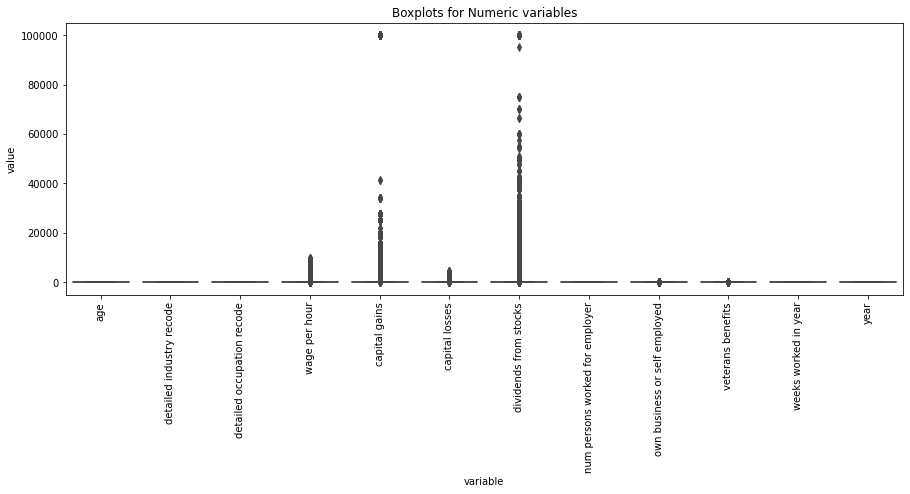

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Boxplots for Numeric variables")
bp=sns.boxplot(x='variable',y='value',data=NumericDataMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

**Observations:**

There are some outliers in columns - 'wage per hour', 'capital gains', 'capital losses', and 'dividends from stocks'.

**Bivariate Analysis for Numeric Columns with Target Variable- 'Income'**

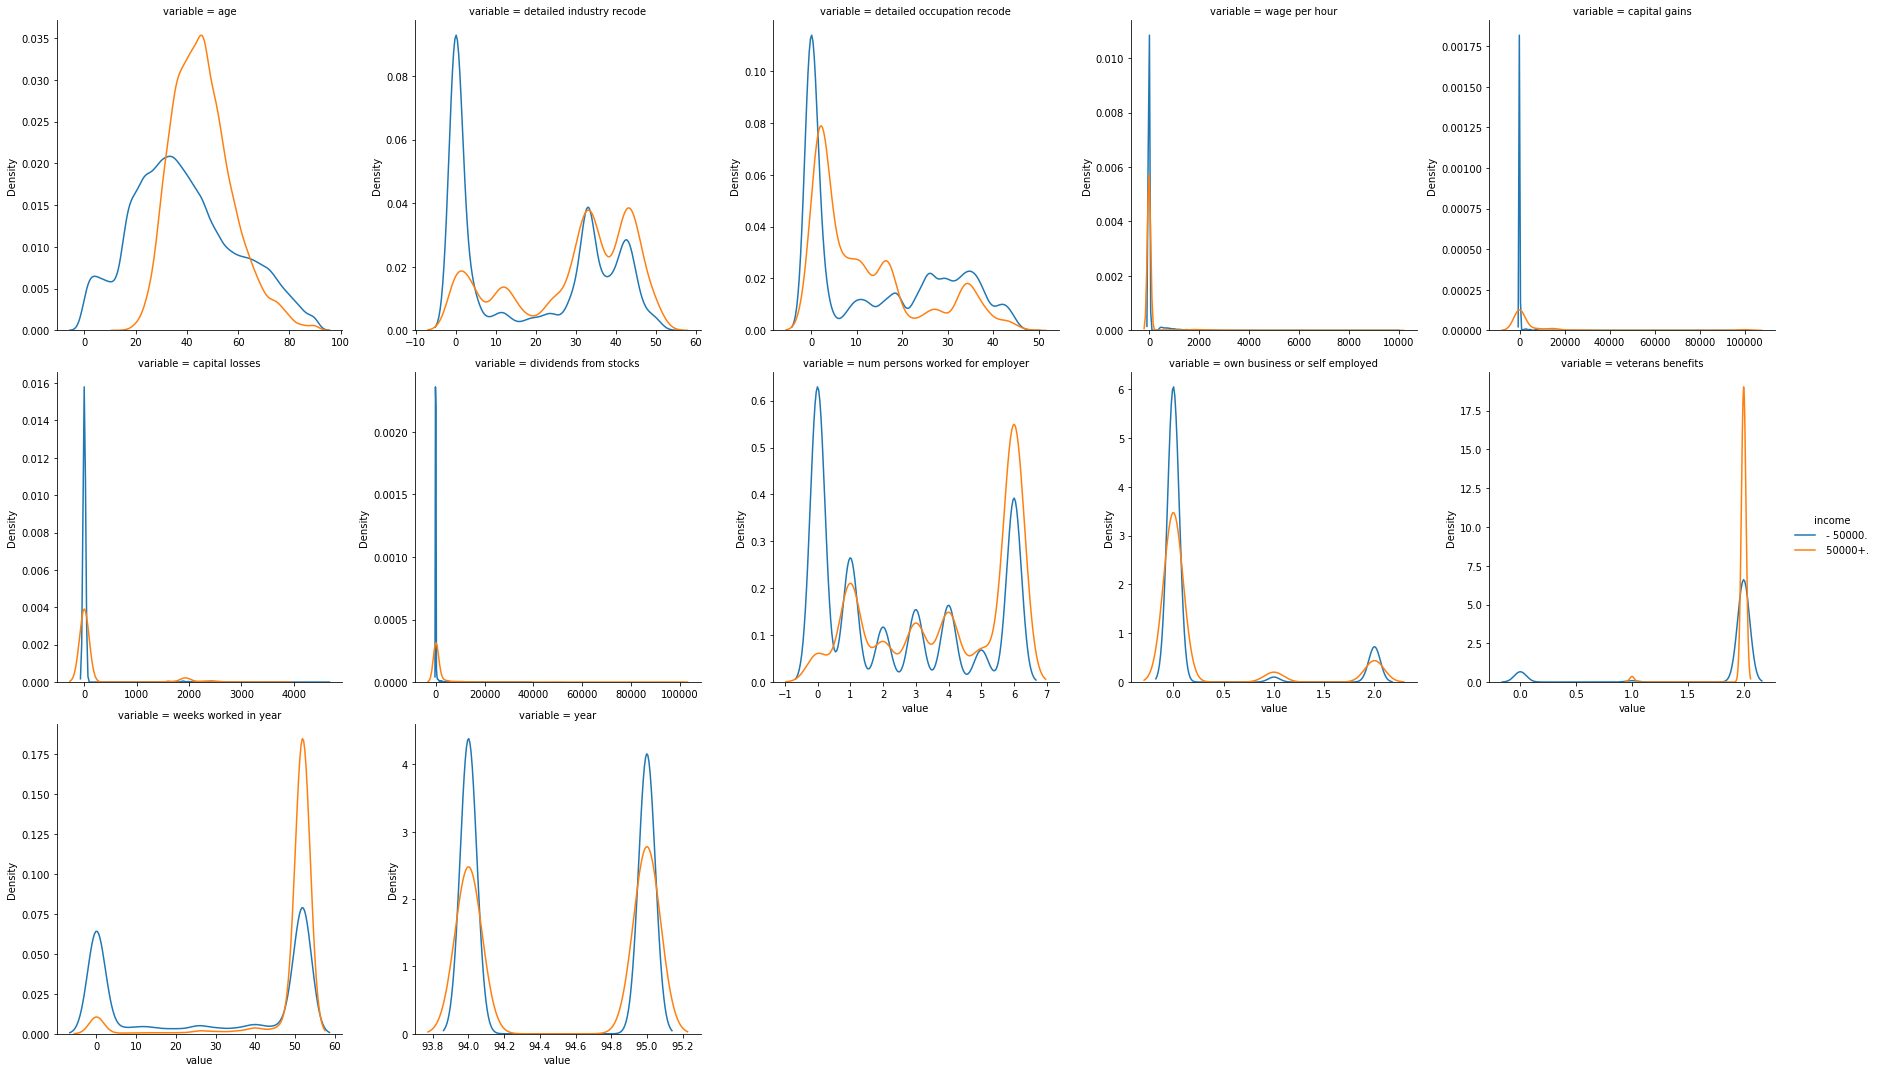

In [ ]:
NumericData['income']= df_train['income'] 
NumericBVData = NumericData.melt(id_vars=['income'])
NumericDataGD = sns.FacetGrid(NumericBVData, col='variable',sharex=False,sharey=False,dropna=True,height=5,col_wrap=5,  hue='income' )
histPlot=NumericDataGD.map(sns.kdeplot,'value' )
NumericDataGD.add_legend()
plt.show()

**Observations:**

As the age increases, the income-level also increases upto a certain extent. A large number of people belonging to age group 25-60 tend to earn more than 50000 dollars in a year.

People having low wage per hour have yearly income less than 50000 dollars.

People having some capital gains, dividends from stocks, or who have worked for larger number of weeks in a year tend to earn more than 50000 dollars in a year.  

In [ ]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if (x < 18):
      return "Less than 18"
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df_train['age_group'] = df_train['age'].apply(age_group)

**Univariate Analysis of Categorical Data**

In [ ]:
CategoricalData=df_train.select_dtypes(include=['object'])
rows,col=(CategoricalData.shape)
print("Number of Category columns are:",col)
print(CategoricalData.columns)

Number of Category columns are: 30
Index(['class of worker', 'education', 'enroll in edu inst last wk',
       'marital stat', 'major industry code', 'major occupation code', 'race',
       'hispanic origin', 'sex', 'member of a labor union',
       'reason for unemployment', 'full or part time employment stat',
       'tax filer stat', 'region of previous residence',
       'state of previous residence', 'detailed household and family stat',
       'detailed household summary in household',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'family members under 18',
       'country of birth father', 'country of birth mother',
       'country of birth self', 'citizenship',
       'fill inc questionnaire for veteran's admin', 'income', 'age_group'],
      dtype='object')


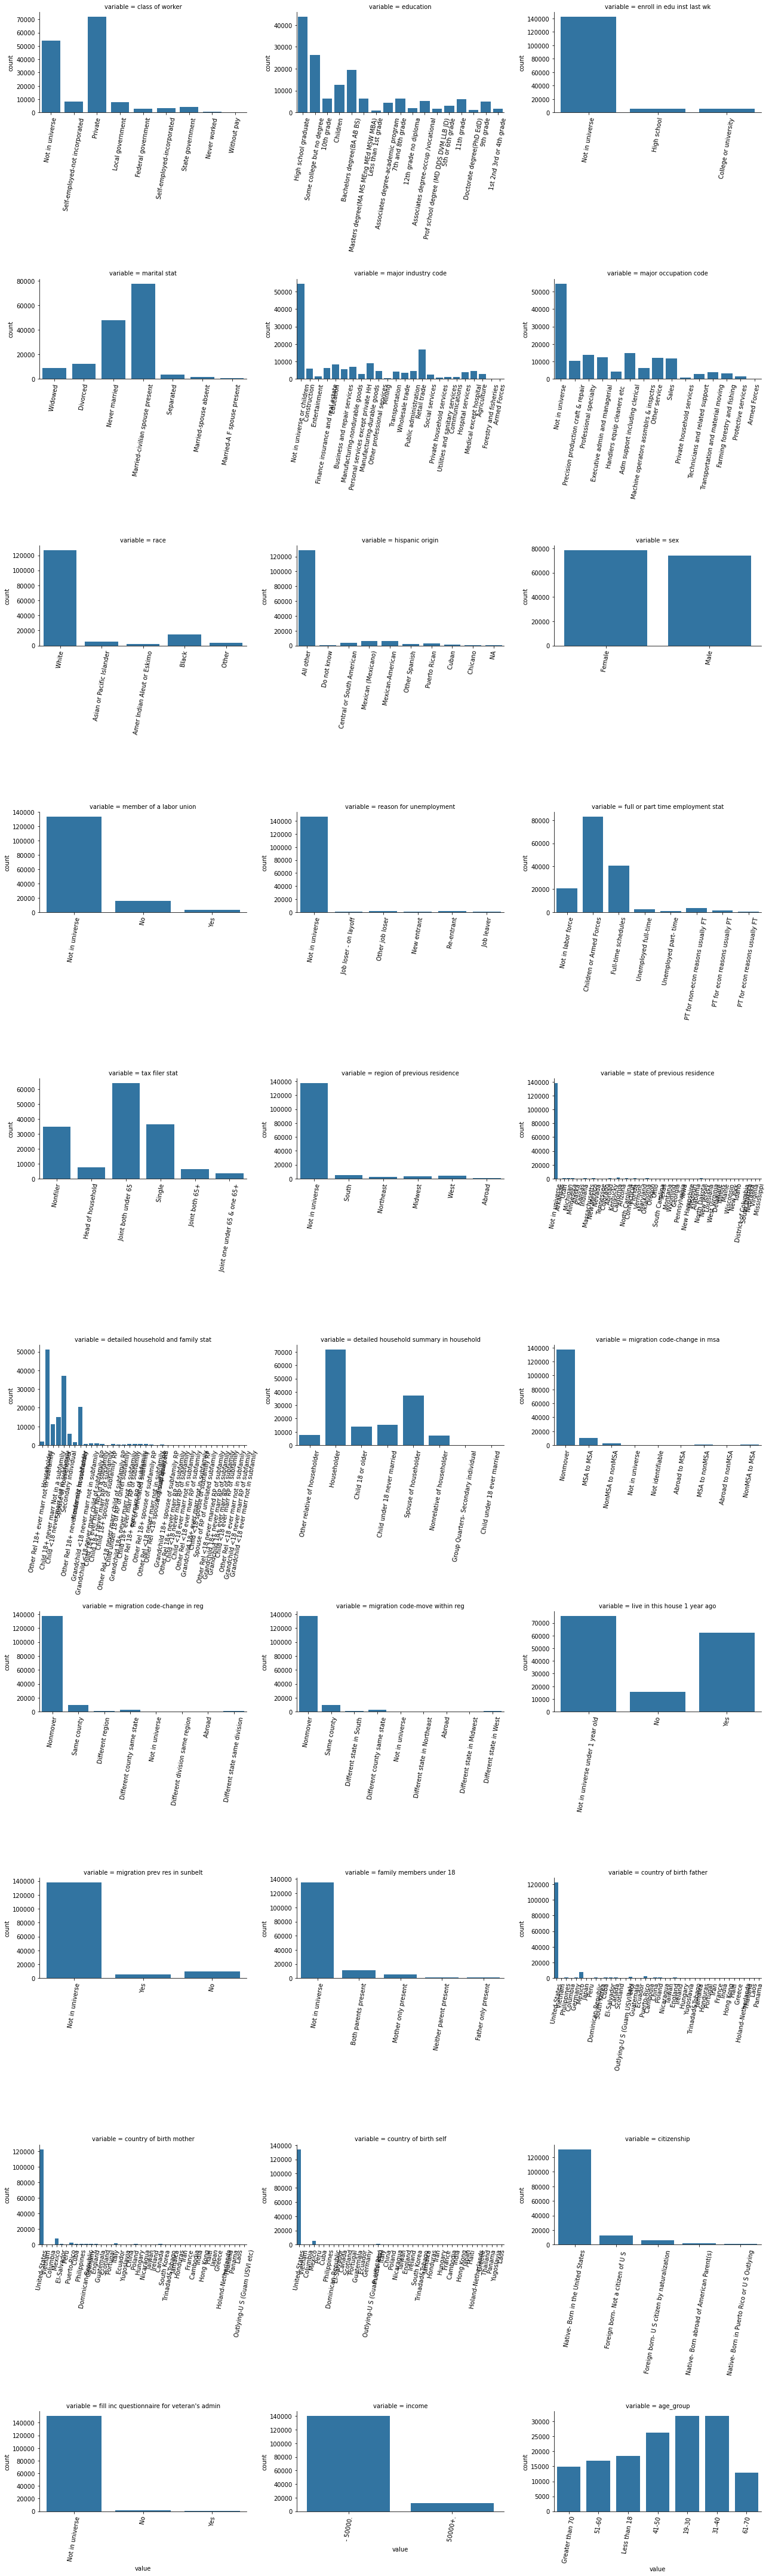

In [ ]:
CategoricalDataMelt=CategoricalData.melt()
CatFacetGrid = sns.FacetGrid(CategoricalDataMelt, col='variable',sharex=False, palette='Greens_r',
                             dropna=True, sharey=False, height=6,col_wrap=3)
CatFacetGrid.set_xticklabels(rotation=80)
countPlot=CatFacetGrid.map(sns.countplot,'value')
countPlot.fig.tight_layout()

**Observations:**

A major chunk of people are private class workers.

Majority of the individuals are Native-Born in the United States having same country of birth for both parents.

There are large number of people with earning less than 50000 dollars.

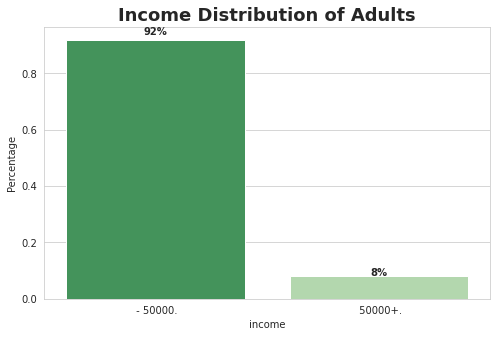

In [ ]:
#Analysing Target Variable
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df_train['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

**Observation:**

The number of people earning less than 50K dollars an year is 92% whilst the people earning more than it is just 8%.

**Bivariate Analysis of Categorical Variables**

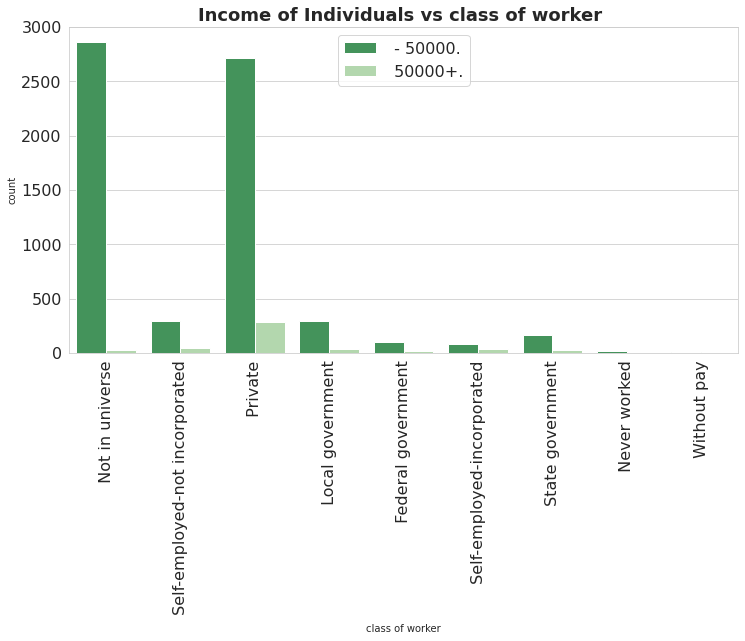

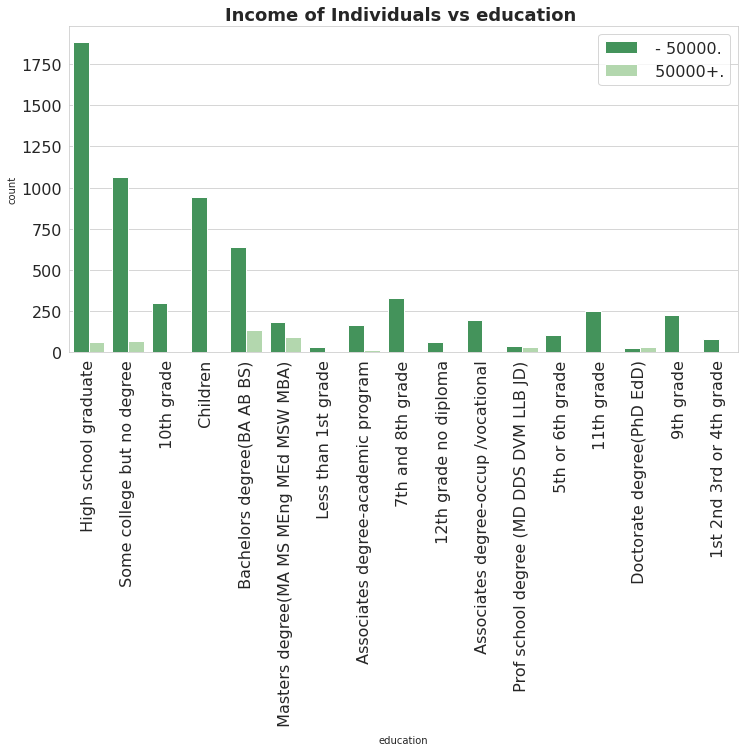

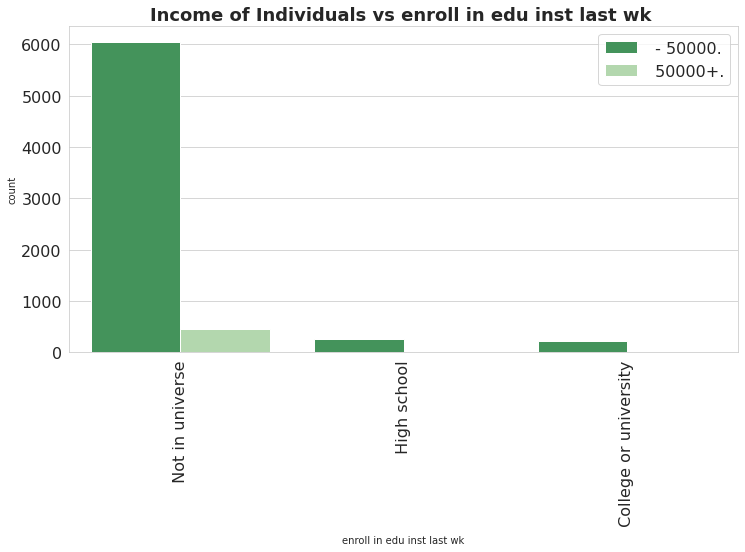

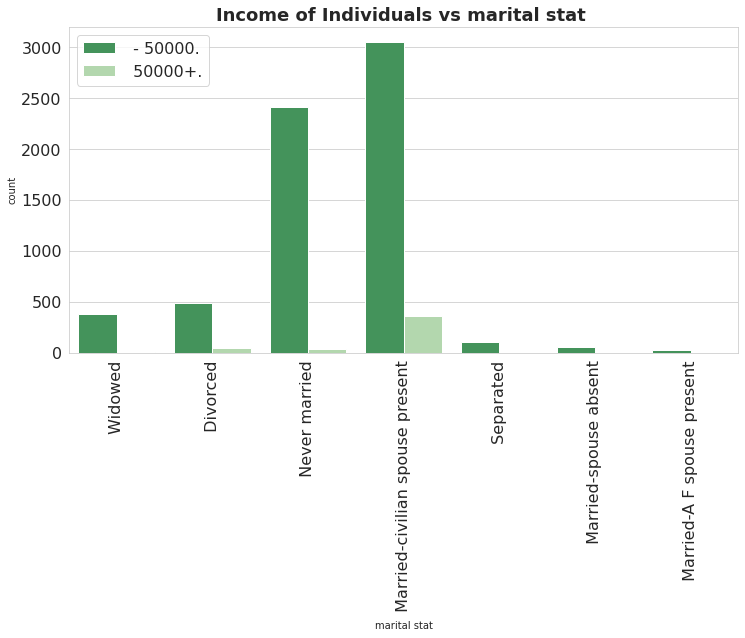

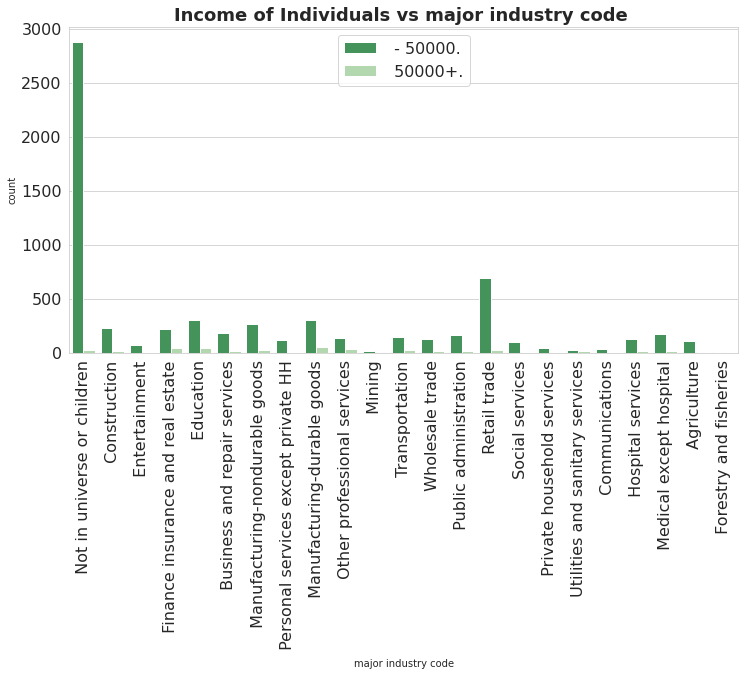

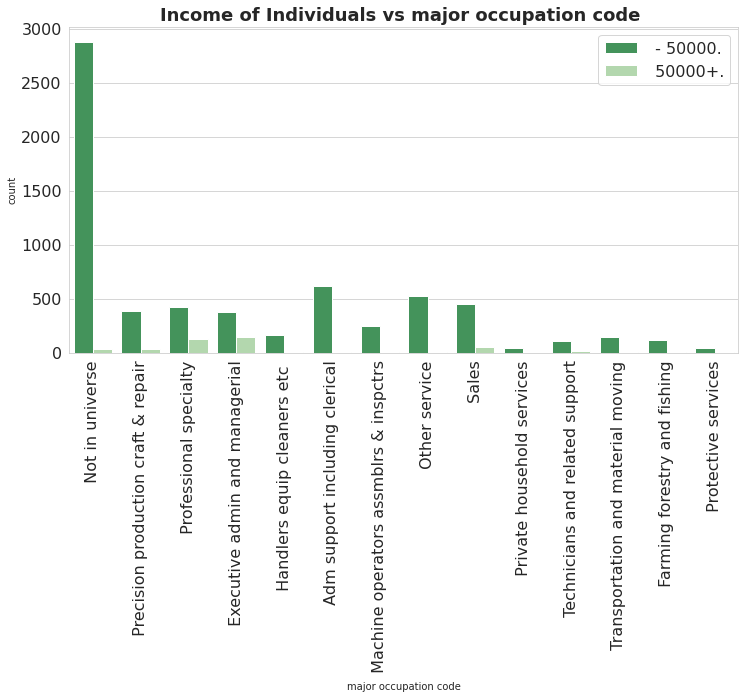

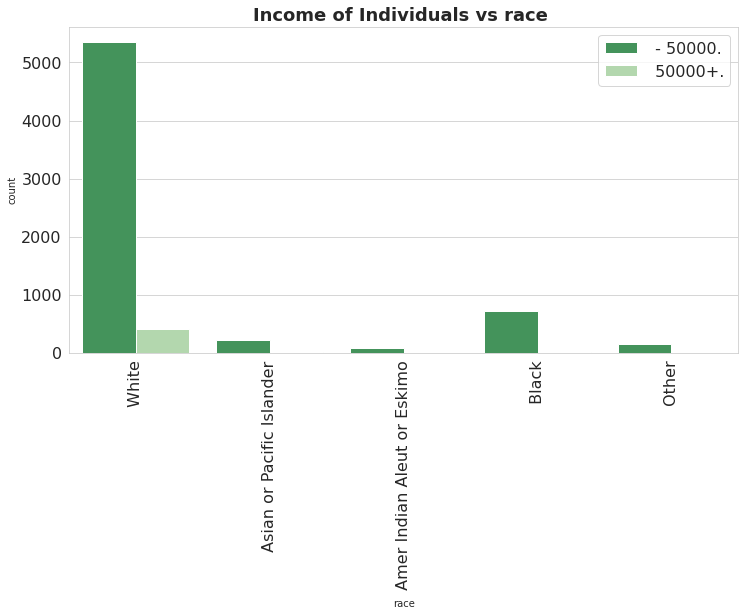

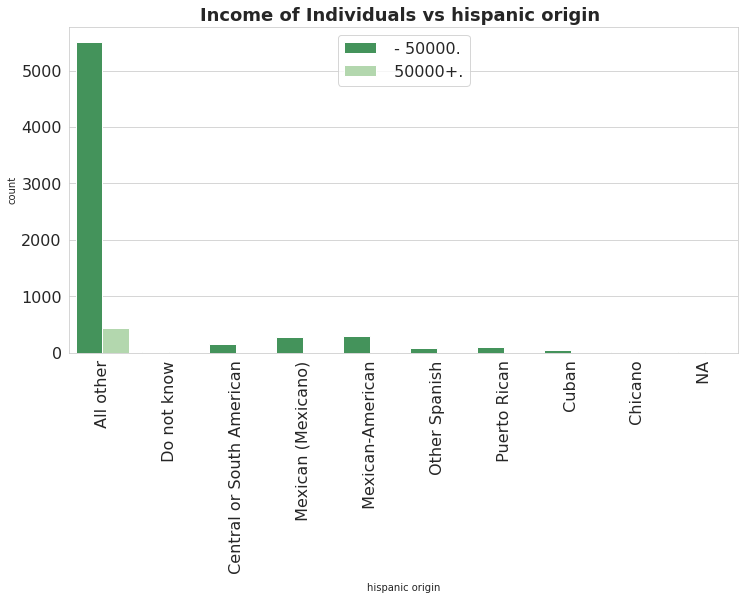

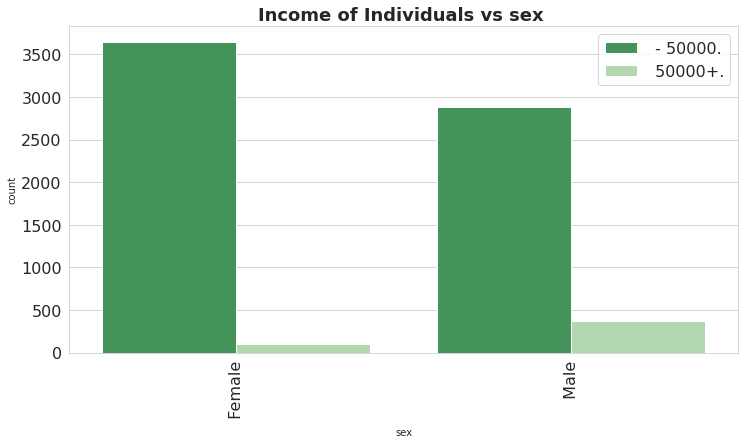

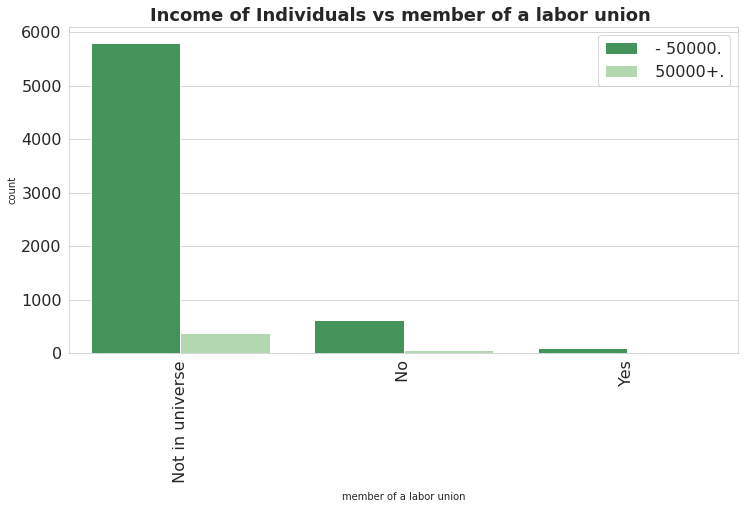

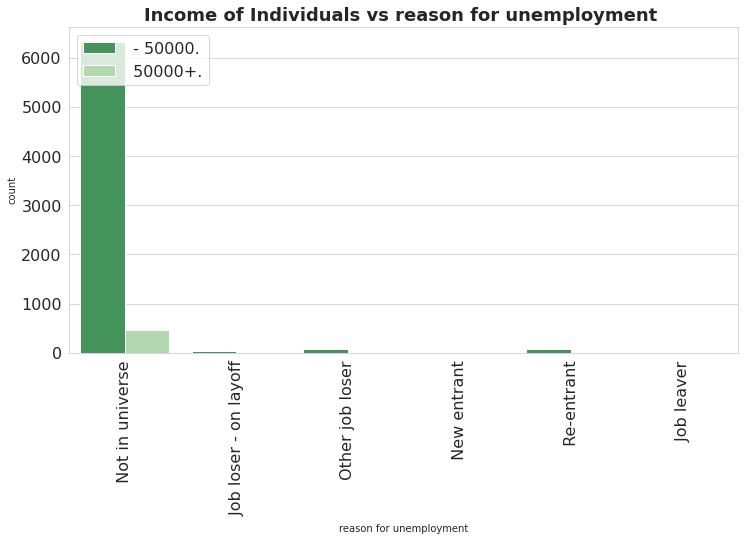

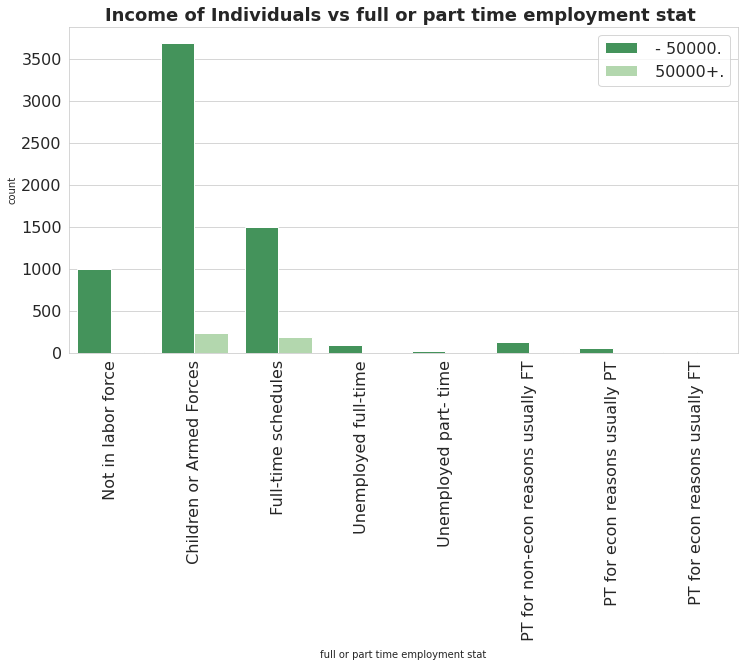

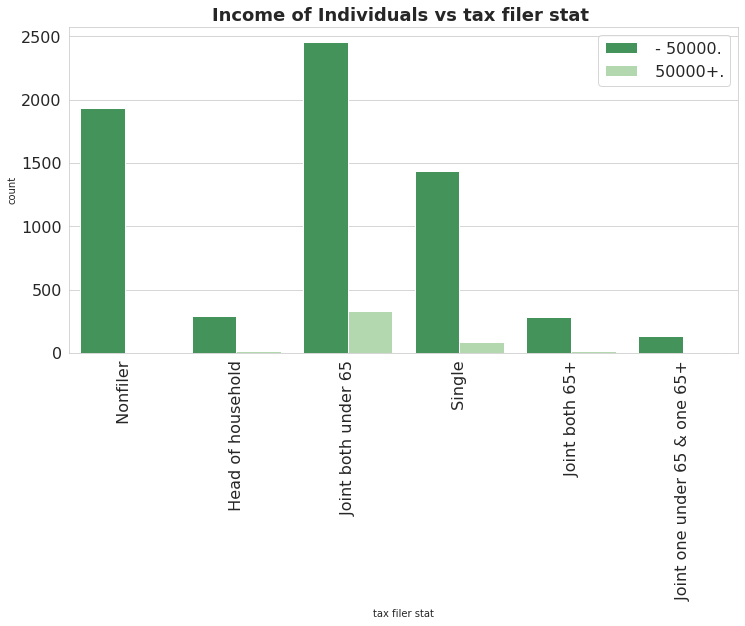

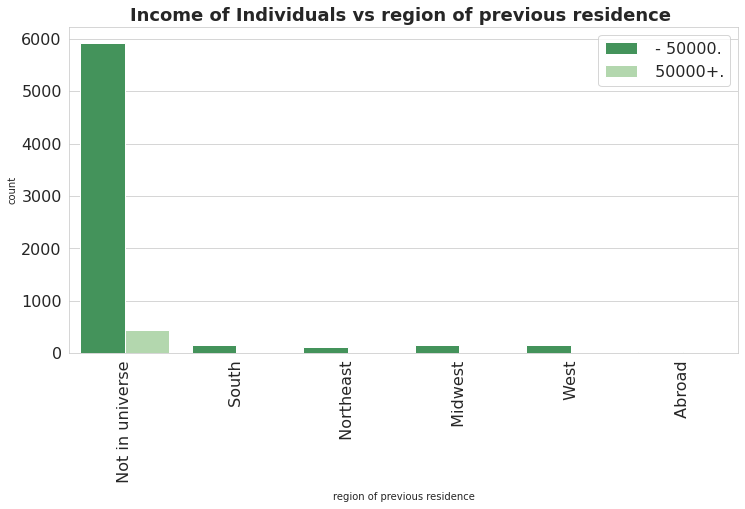

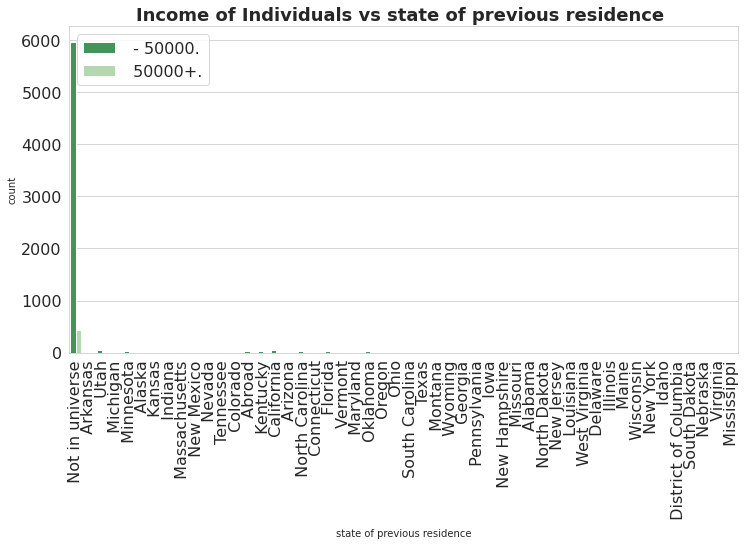

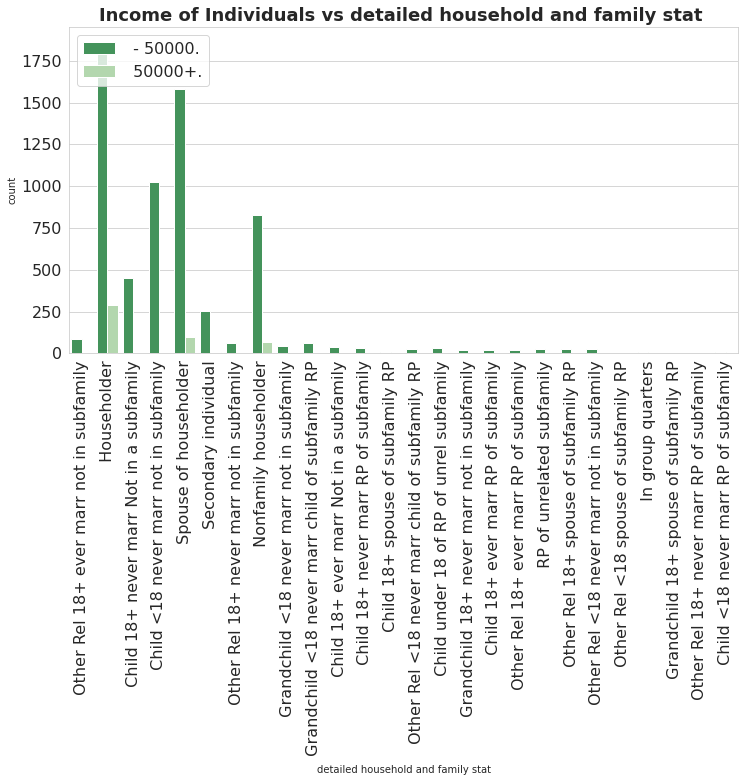

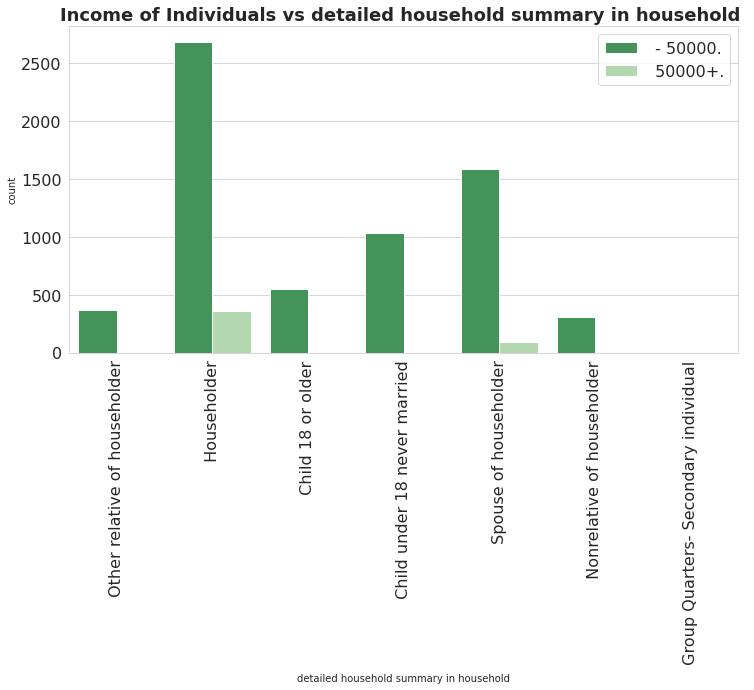

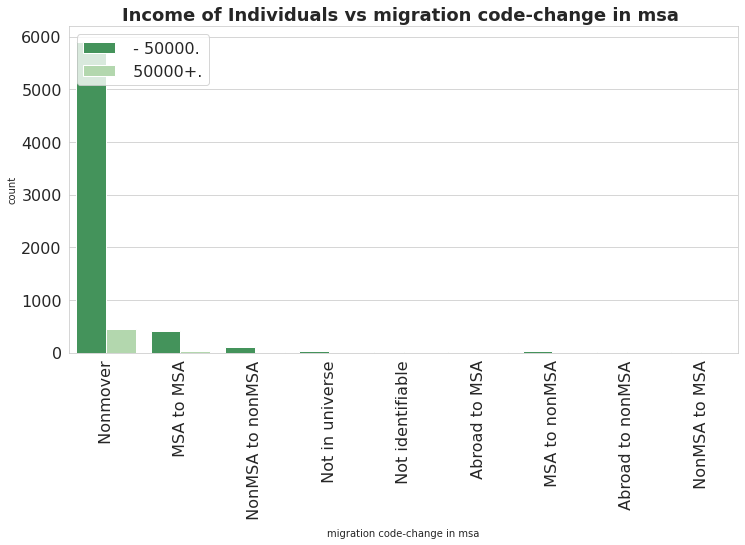

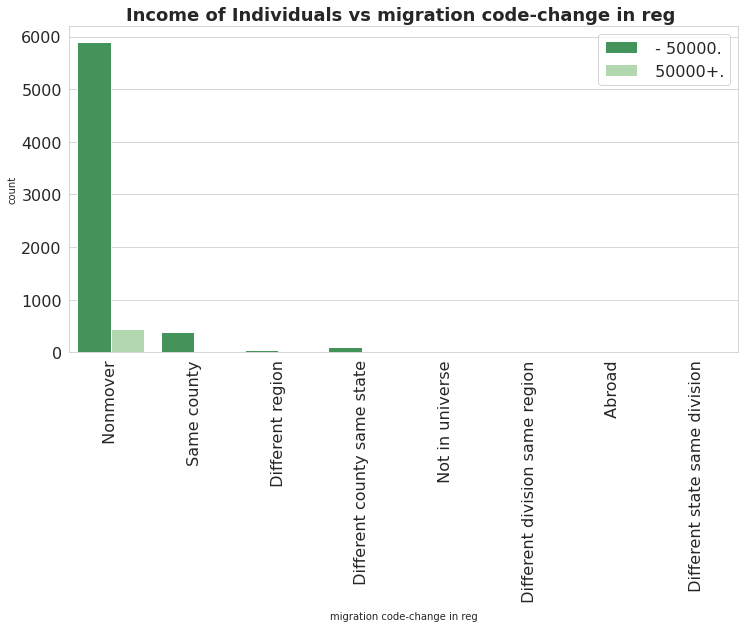

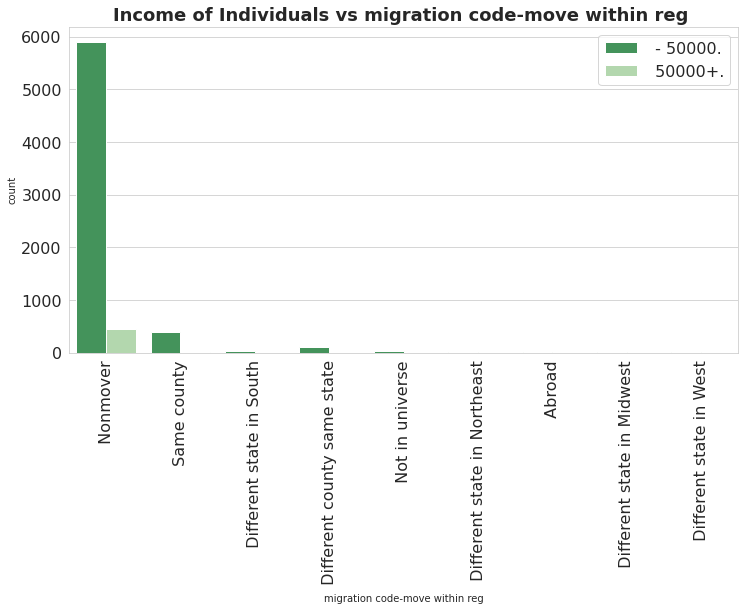

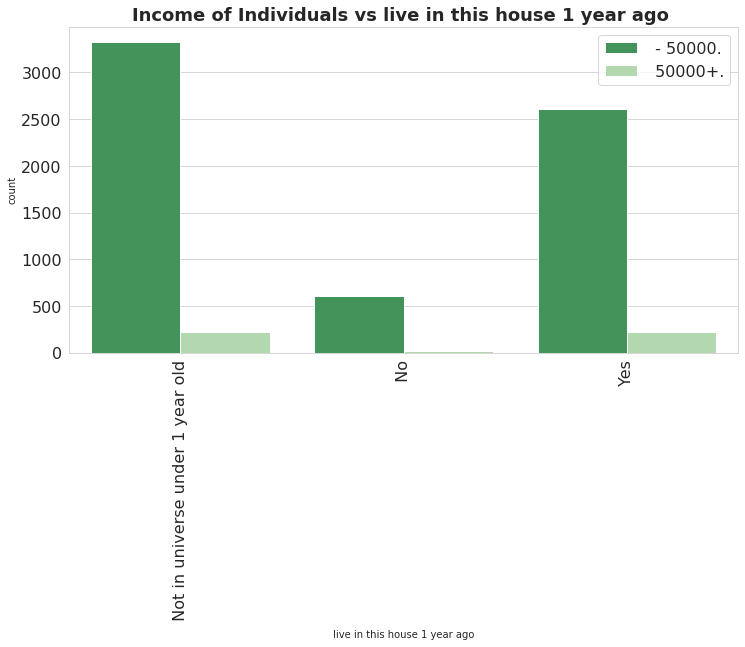

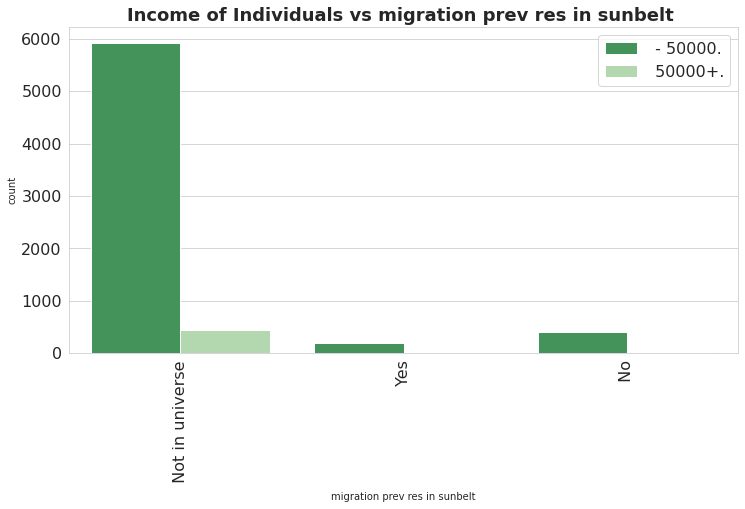

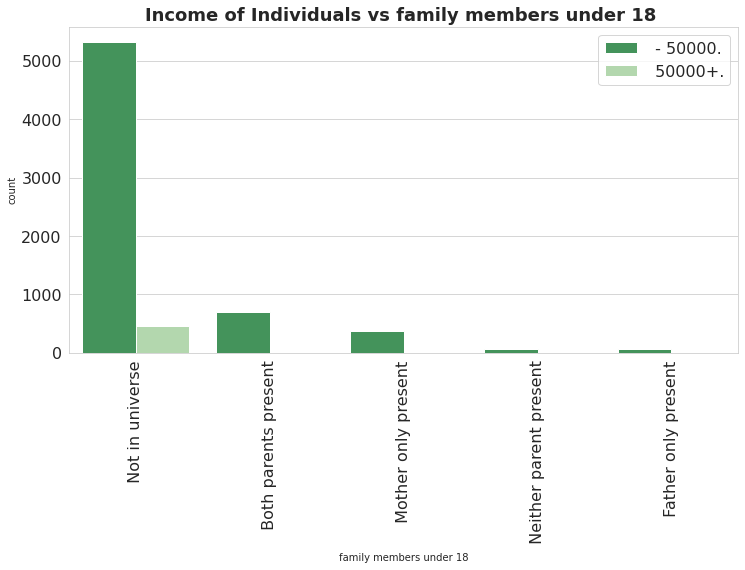

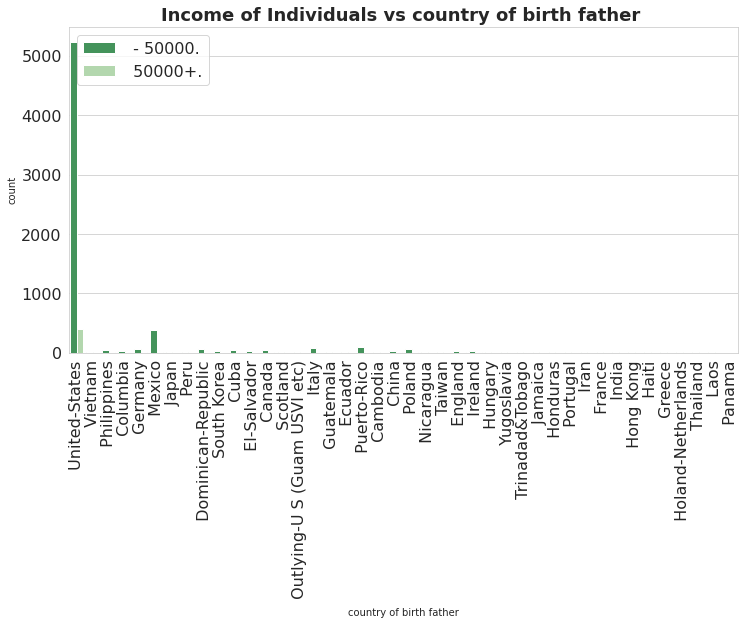

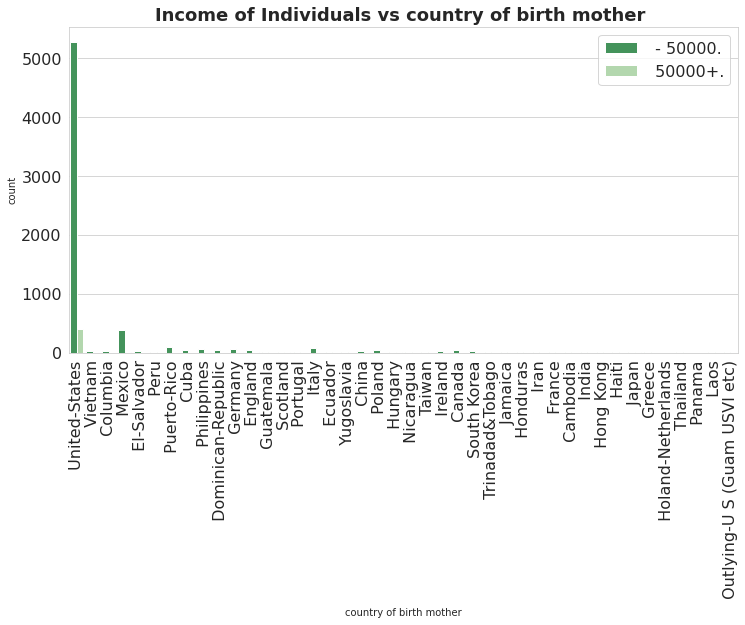

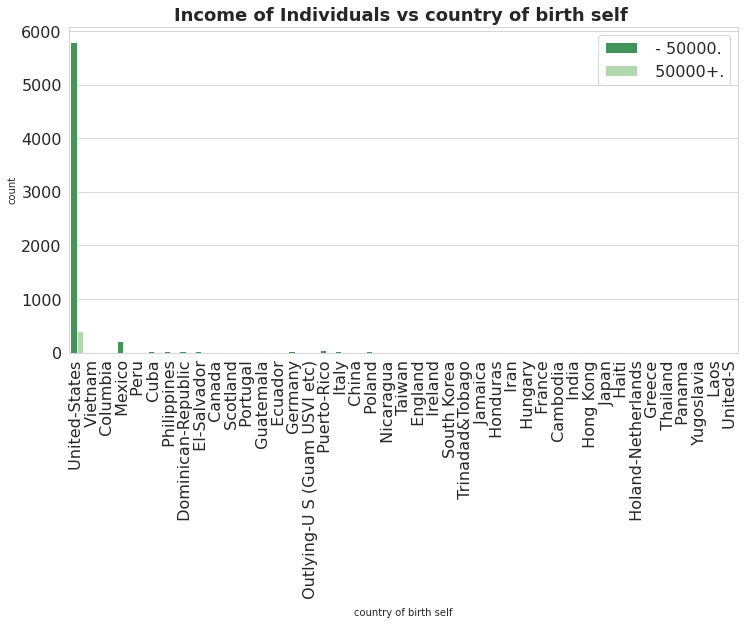

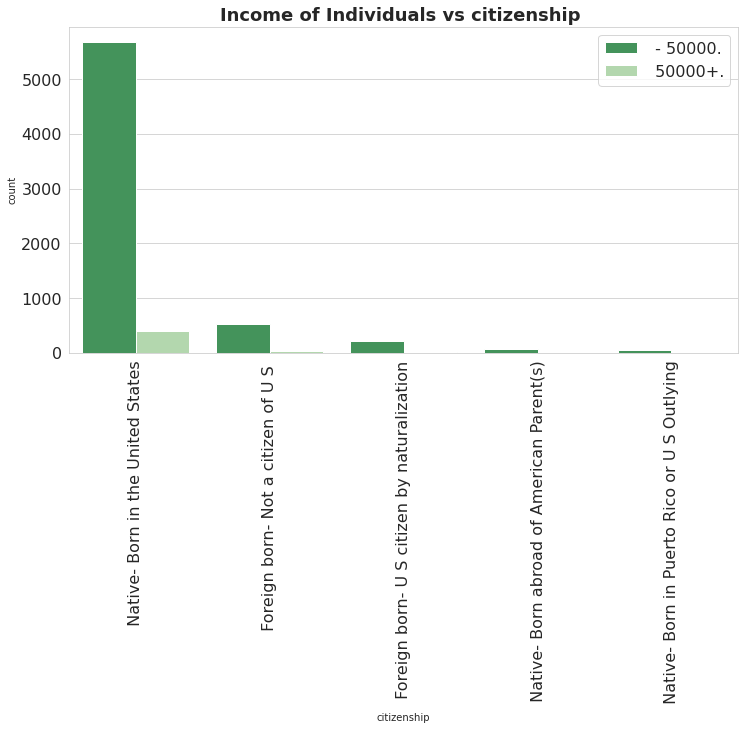

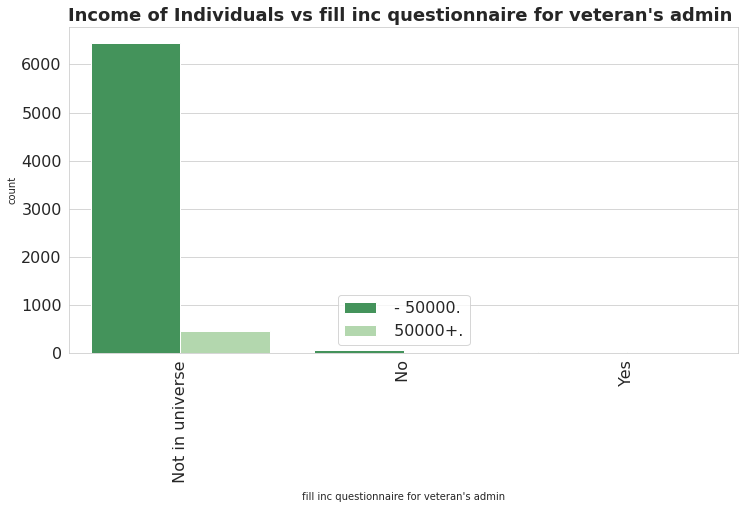

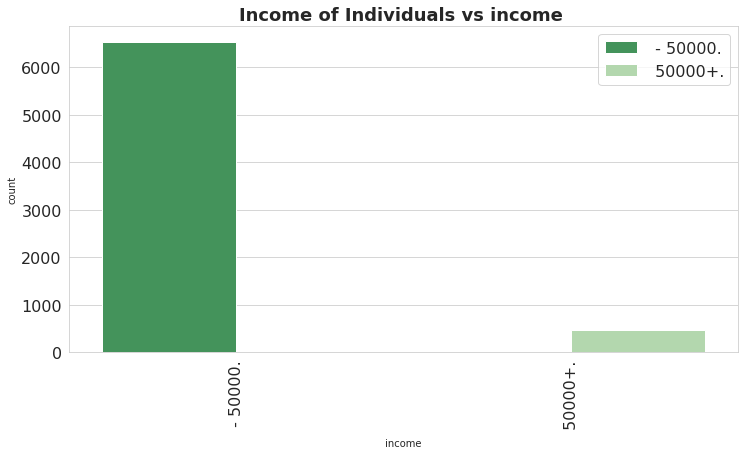

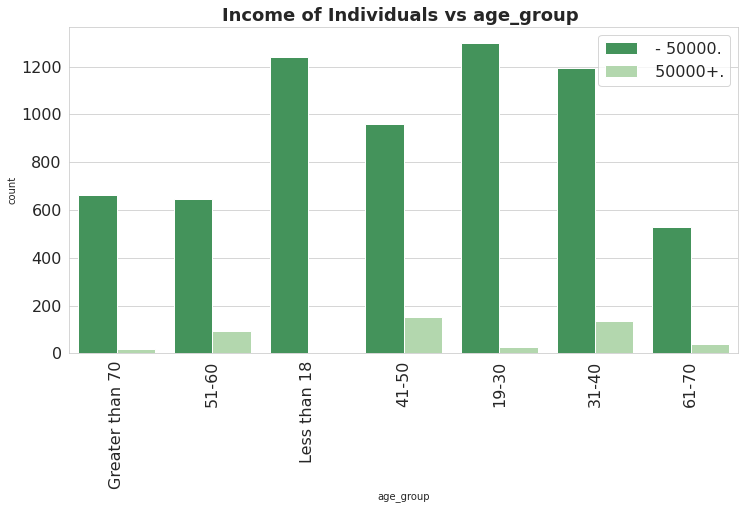

In [ ]:
for i in CategoricalData.columns:
  plt.figure(figsize=(12,6))
  sns.countplot(df_train[i], hue = df_train['income'], palette='Greens_r')
  plt.title(f'Income of Individuals vs {i} ', fontsize=18, fontweight='bold')
  plt.xticks(fontsize=16,rotation = 90)
  plt.yticks(fontsize=16)
  plt.legend(fontsize=16)

**Observations:**

As one might imagine, there is no income for people aged less than 18 years and the number of people earning more than 50K is quite negligible amongst people of age group 19-30.

People working in the Private Sector face a significant difference between their pays where majority of them earn less than 50K dollars an year. 
There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the Federal Govt or are self-employed-incorporated.
People belonging to the category Without-Pay and Never-Worked hardly contain any data in both the categories

Individuals having Masters degree, Prof school degree, or Doctorate degree have high probability of earning more than 50K dollars.

People who work in educational sector, finance insurance and real estate, or manufacturing durable goods may earn more than 50K dollars.
There are negligible chances of people working in Agriculture, Forestry and fisheries, Mining to earn more than 50K dollars.

More number of males tend to earn more than 50K dollars in a year than females.

People having age less than 65 years and earning more than 50K dollars are likely to file the joint Income Tax application. Individuals who do not file their Income tax mostly earn less than 50K dollars in a year.

Householders generally earn more than other family members and have high chances of earning more than 50K dollars.

People who are native-born in the US are more vulnerable to have yearly income more than 50K dollars.

# **One-Hot Encoding**

Converting Categorical Variables to Numerical Variables

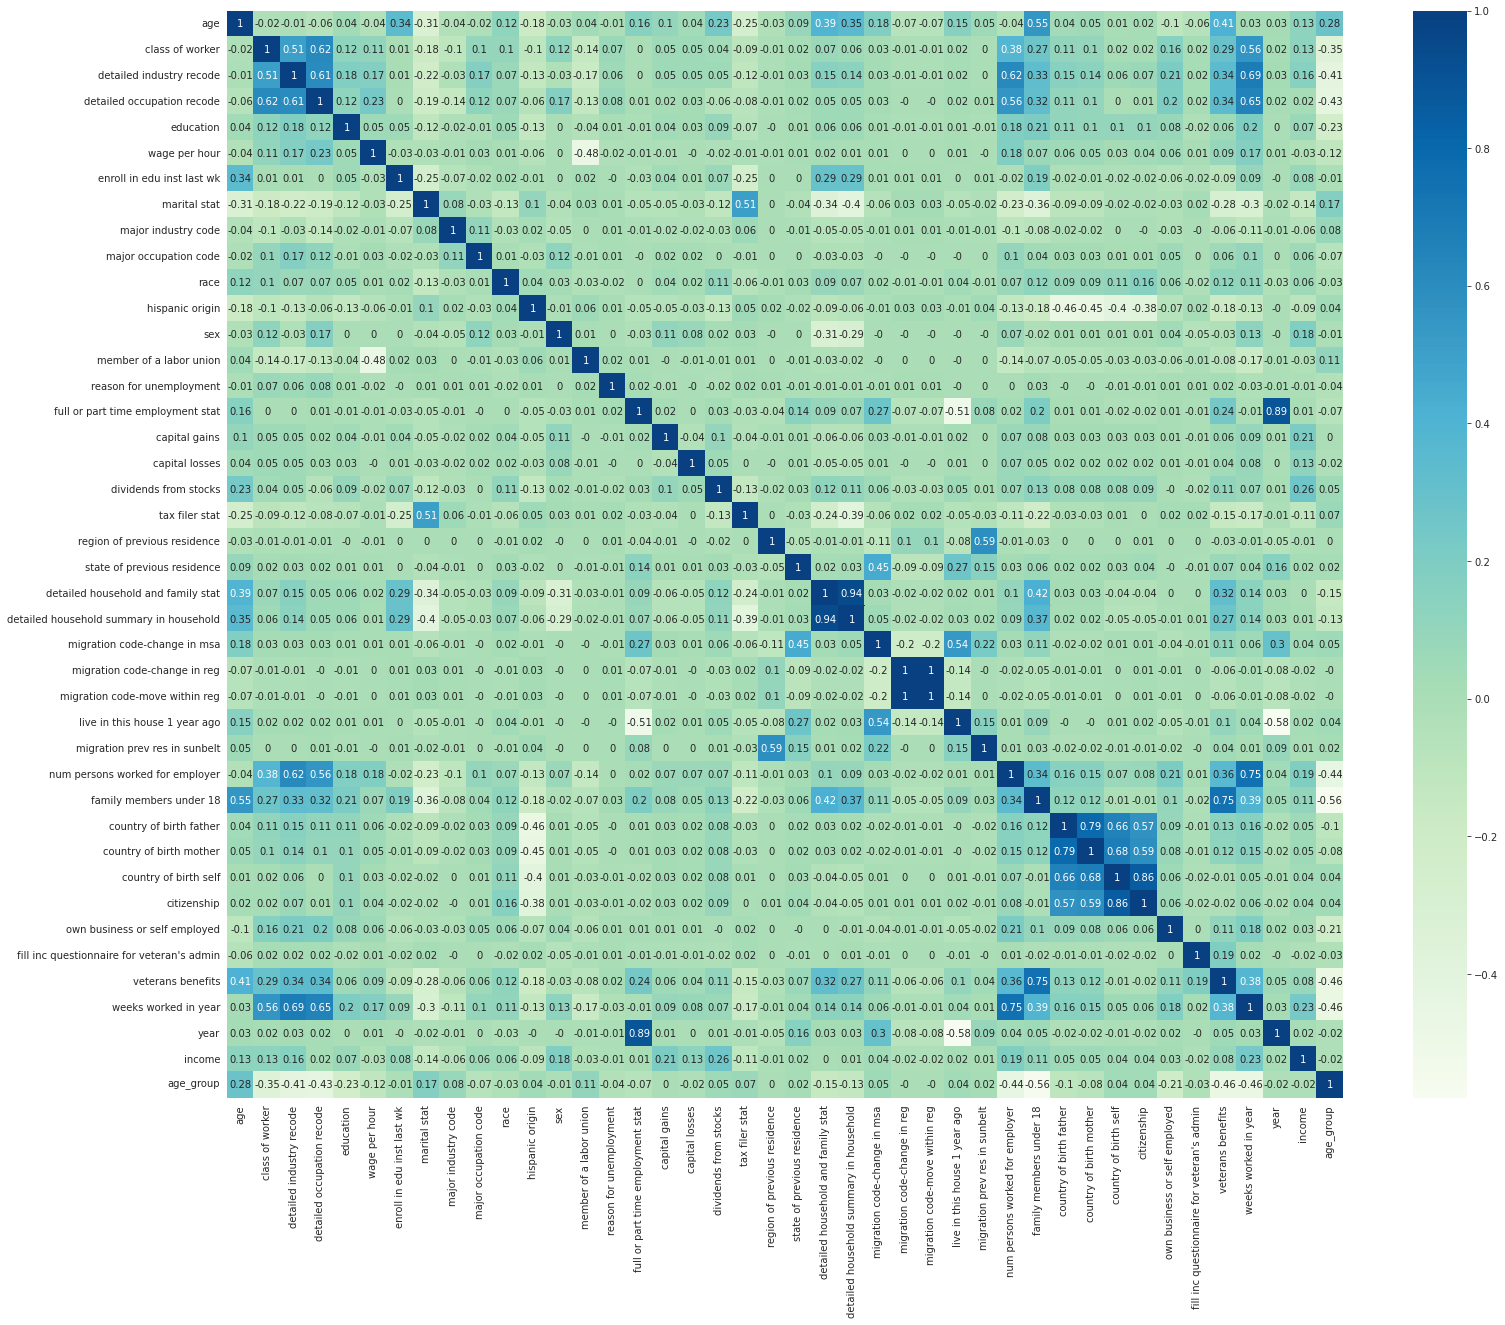

In [ ]:
temp=df_train.copy()
le = LabelEncoder()
for feat in CategoricalData:
    temp[feat] = le.fit_transform(temp[feat].astype(str))

#plottting correlational plot checking Correlations
plt.figure(figsize=(25,20))
sns.heatmap(round(temp.corr(method='spearman'),2),annot=True,mask=None,cmap='GnBu')
plt.show()

**Observations:**

'detailed household and family stat' does not have any correlation with 'income'. Thus, it can be dropped.

'migration code-change in reg' and 'migration code-move within reg' have correlation of 1. Thus, either of them can be dropped.

columns- 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship' are highly collinear with each other. Thus, any one of them can be used.

Columns having absolute correlation coefficient less than 0.02 should be dropped.


In [ ]:
X= temp[temp.columns.difference(['income'])]
Y= temp['income']

#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2) #, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores

Feature         Score
0                                          age  1.452313e+04
1                                    age_group  6.959119e+02
2                                capital gains  4.324089e+08
3                               capital losses  5.789962e+06
4                                  citizenship  9.890525e+01
5                              class of worker  2.989145e+02
6                      country of birth father  6.504520e+02
7                      country of birth mother  5.390012e+02
8                        country of birth self  1.984240e+02
9           detailed household and family stat  8.097750e+02
10     detailed household summary in household  1.628893e+02
11                    detailed industry recode  5.704021e+04
12                  detailed occupation recode  6.240099e+03
13                       dividends from stocks  8.823352e+07
14                                   education  2.868340e+03
15                  enroll in edu inst last wk  7.103539e+01
16                     family members under 18  5.275242e+02
17  fill inc questionnaire for veteran's admin  9.433951e-01
18           full or part time employment stat  2.857789e+01
19                             hispanic origin  5.130994e+03
20               live in this house 1 year ago  4.425722e+01
21                         major industry code  1.028976e+03
22                       major occupation code  9.208123e+02
23                                marital stat  1.809008e+03
24                     member of a labor union  1.235724e+01
25                migration code-change in msa  5.066366e+01
26                migration code-change in reg  1.386147e+00
27              migration code-move within reg  1.872687e-01
28               migration prev res in sunbelt  9.790078e-01
29             num persons worked for employer  1.141109e+04
30               own business or self employed  6.856127e+01
31                                        race  9.719530e+01
32                     reason for unemployment  4.947223e-01
33                region of previous residence  6.149088e-02
34                                         sex  2.491691e+03
35                 state of previous residence  1.377750e+02
36                              tax filer stat  1.464682e+03
37                           veterans benefits  1.897665e+02
38                               wage per hour  1.649125e+04
39                        weeks worked in year  1.452758e+05
40                                        year  2.084390e-01

In [ ]:
print(f_Scores.nlargest(16,'Score'))

                            Feature         Score
2                     capital gains  4.324089e+08
13            dividends from stocks  8.823352e+07
3                    capital losses  5.789962e+06
39             weeks worked in year  1.452758e+05
11         detailed industry recode  5.704021e+04
38                    wage per hour  1.649125e+04
0                               age  1.452313e+04
29  num persons worked for employer  1.141109e+04
12       detailed occupation recode  6.240099e+03
19                  hispanic origin  5.130994e+03
14                        education  2.868340e+03
34                              sex  2.491691e+03
23                     marital stat  1.809008e+03
36                   tax filer stat  1.464682e+03
21              major industry code  1.028976e+03
22            major occupation code  9.208123e+02


# **Data Modelling**

**Feature Selection**

In [ ]:
less_corr_cols = ['reason for unemployment', 'full or part time employment stat', 'region of previous residence',
                  'detailed household and family stat', 'detailed household summary in household', 
                  'migration code-change in reg', 'migration prev res in sunbelt', 
                  'country of birth father', 'country of birth mother', 'country of birth self', 'age_group']
temp.drop(columns= less_corr_cols, inplace= True)

In [ ]:
X= temp[temp.columns.difference(['income'])]
Y= temp['income']

**Data Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

**Feature Scaling**

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Algorithms to be used**:

Random Forest: This is an ensemble method that uses multiple decision trees to make predictions. It is often considered **a strong performer for many types of classification problems** especially when there are outliers.

XG Boost Classifier: This algorithm is very useful for handling large datasets due to **parallel computing**. Since the dataset used in this work has large volume of data, thus it can be proved very much useful. Additionally, it reduces Overfitting

AdaBoost Classifier: This is another useful algorithm which is very useful to handle classification especially when **there are larger number of features and instances** available. 

CatBoost Classifier: This algorithm is often **considered better than other popular algorithms** such as XG Boost or CatBoost. Thus, the training using this algorithm can be proved insightful.



# **Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
def cm_and_cr(y_pred, y_test = y_test):
  cm= confusion_matrix(y_test, y_pred)
  print("Confusion matrix:\n", cm)

  # Generate the classification report
  cf_mx = classification_report(y_test, y_pred)
  cf = classification_report(y_test, y_pred, output_dict=True)
  print("\nClassification report:\n", cf_mx)

  plt.rcParams['figure.figsize'] = (3, 3)
  sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = '.8g')
  plt.xlabel('Predicted Values')
  plt.ylabel('Actual Values')
  plt.show()

  return cf


Confusion matrix:
 [[27732   375]
 [ 1412  1061]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     28107
           1       0.74      0.43      0.54      2473

    accuracy                           0.94     30580
   macro avg       0.85      0.71      0.76     30580
weighted avg       0.93      0.94      0.93     30580



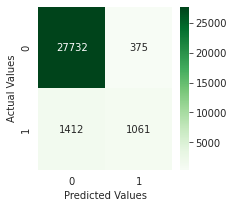

In [ ]:
ev_rf = cm_and_cr(y_pred_rf)

# **Extreme Gradient Boosting Algorithms**

Confusion matrix:
 [[27824   283]
 [ 1554   919]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     28107
           1       0.76      0.37      0.50      2473

    accuracy                           0.94     30580
   macro avg       0.86      0.68      0.73     30580
weighted avg       0.93      0.94      0.93     30580



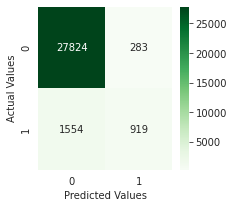

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)


ev_xgb = cm_and_cr(y_pred_xgb)

# **AdaBoost Classifier**

Confusion matrix:
 [[27767   340]
 [ 1617   856]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     28107
           1       0.72      0.35      0.47      2473

    accuracy                           0.94     30580
   macro avg       0.83      0.67      0.72     30580
weighted avg       0.93      0.94      0.93     30580



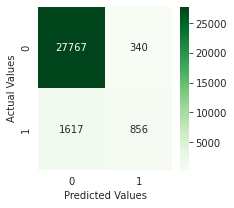

In [ ]:

base_estimator = DecisionTreeClassifier(max_depth=1)
ab_clf = AdaBoostClassifier(base_estimator=base_estimator)
ab_clf.fit(X_train, y_train)
y_pred_ab= ab_clf.predict(X_test)


ev_ab = cm_and_cr(y_pred_ab)

# **CatBoost Classifier**


Learning rate set to 0.080221
0:	learn: 0.5682791	total: 102ms	remaining: 1m 41s
1:	learn: 0.4832581	total: 170ms	remaining: 1m 24s
2:	learn: 0.4152988	total: 210ms	remaining: 1m 9s
3:	learn: 0.3610486	total: 273ms	remaining: 1m 7s
4:	learn: 0.3220634	total: 345ms	remaining: 1m 8s
5:	learn: 0.2937749	total: 389ms	remaining: 1m 4s
6:	learn: 0.2687028	total: 434ms	remaining: 1m 1s
7:	learn: 0.2500881	total: 472ms	remaining: 58.5s
8:	learn: 0.2346017	total: 509ms	remaining: 56.1s
9:	learn: 0.2259445	total: 546ms	remaining: 54.1s
10:	learn: 0.2173190	total: 578ms	remaining: 51.9s
11:	learn: 0.2098093	total: 645ms	remaining: 53.1s
12:	learn: 0.2027391	total: 753ms	remaining: 57.1s
13:	learn: 0.1971236	total: 855ms	remaining: 1m
14:	learn: 0.1931716	total: 960ms	remaining: 1m 3s
15:	learn: 0.1903861	total: 1.07s	remaining: 1m 6s
16:	learn: 0.1873928	total: 1.22s	remaining: 1m 10s
17:	learn: 0.1847696	total: 1.32s	remaining: 1m 12s
18:	learn: 0.1823669	total: 1.4s	remaining: 1m 12s
19:	learn:

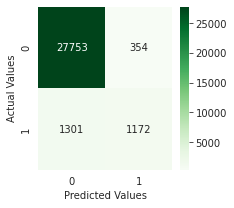

In [ ]:
cb_clf= CatBoostClassifier()
cb_clf.fit(X_train, y_train)
y_pred_cb = cb_clf.predict(X_test)

ev_cb = cm_and_cr(y_pred_cb)

# **Comparison of Models**

In [ ]:
f1_score = {"Random Forest":ev_rf["macro avg"]["f1-score"],  
              "XG Boost":ev_xgb["macro avg"]["f1-score"], 
              "Ada Boost Classifier":ev_ab["macro avg"]["f1-score"], 
              "Cat Boost":ev_cb["macro avg"]["f1-score"]}

print(f"The best macro F1 Score has been obtained with {max(f1_score, key=f1_score.get)}")

The best macro F1 Score has been obtained with Cat Boost


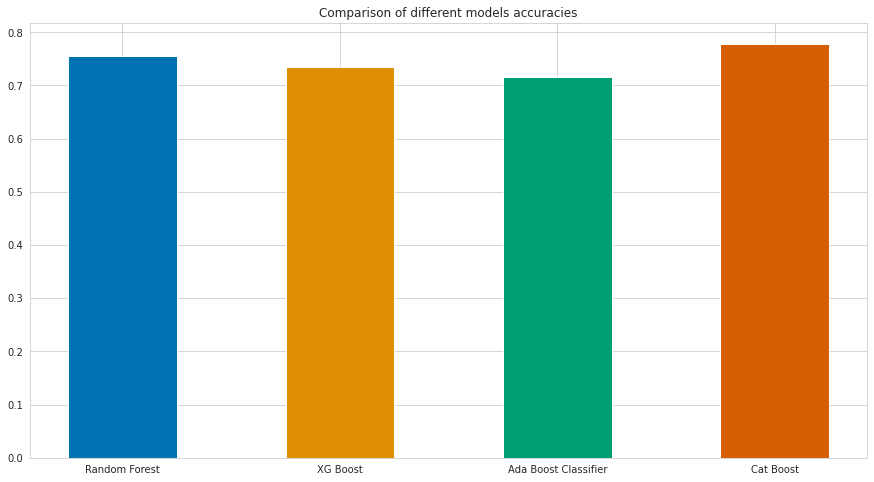

In [ ]:
plt.figure(figsize=(15,8))
data = [*zip(*f1_score.items())]

plt.bar(*zip(*f1_score.items()), color=sns.color_palette("colorblind"), width = 0.5)
plt.title("Comparison of different models accuracies")
plt.show()

**Hyperparameter Tuning**

In [ ]:
# define the parameters to be tuned
parameters = {'depth':[4, 6, 8],
              'learning_rate':[0.1, 0.01, 0.05],
              'iterations':[100, 250, 500],
              'l2_leaf_reg':[3, 1, 5],
              'border_count':[32, 5, 10],
              'random_seed':[42]}

cb_clf_ht = GridSearchCV(cb_clf, parameters, cv=2)
cb_clf_ht.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", cb_clf_ht.best_params_)


Streaming output truncated to the last 5000 lines.
274:	learn: 0.1475579	total: 5.8s	remaining: 4.74s
275:	learn: 0.1475140	total: 5.81s	remaining: 4.72s
276:	learn: 0.1474660	total: 5.83s	remaining: 4.7s
277:	learn: 0.1473976	total: 5.87s	remaining: 4.68s
278:	learn: 0.1473483	total: 5.88s	remaining: 4.66s
279:	learn: 0.1472732	total: 5.91s	remaining: 4.64s
280:	learn: 0.1472181	total: 5.92s	remaining: 4.62s
281:	learn: 0.1471614	total: 5.94s	remaining: 4.59s
282:	learn: 0.1471162	total: 5.96s	remaining: 4.57s
283:	learn: 0.1470580	total: 5.98s	remaining: 4.55s
284:	learn: 0.1470153	total: 6s	remaining: 4.53s
285:	learn: 0.1469787	total: 6.02s	remaining: 4.5s
286:	learn: 0.1469258	total: 6.04s	remaining: 4.48s
287:	learn: 0.1468675	total: 6.06s	remaining: 4.46s
288:	learn: 0.1468240	total: 6.09s	remaining: 4.45s
289:	learn: 0.1467894	total: 6.11s	remaining: 4.43s
290:	learn: 0.1467613	total: 6.13s	remaining: 4.41s
291:	learn: 0.1467181	total: 6.16s	remaining: 4.38s
292:	learn: 0.14667

In [ ]:
print("Best hyperparameters: ", cb_clf_ht.best_params_)

Best hyperparameters:  {'border_count': 32, 'depth': 8, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.05, 'random_seed': 42}


0:	learn: 0.6041421	total: 151ms	remaining: 1m 15s
1:	learn: 0.5399190	total: 309ms	remaining: 1m 17s
2:	learn: 0.4916007	total: 557ms	remaining: 1m 32s
3:	learn: 0.4476366	total: 749ms	remaining: 1m 32s
4:	learn: 0.4129790	total: 942ms	remaining: 1m 33s
5:	learn: 0.3760236	total: 1.15s	remaining: 1m 34s
6:	learn: 0.3452641	total: 1.26s	remaining: 1m 28s
7:	learn: 0.3189902	total: 1.3s	remaining: 1m 20s
8:	learn: 0.2979890	total: 1.35s	remaining: 1m 13s
9:	learn: 0.2811417	total: 1.41s	remaining: 1m 8s
10:	learn: 0.2672373	total: 1.45s	remaining: 1m 4s
11:	learn: 0.2540398	total: 1.52s	remaining: 1m 1s
12:	learn: 0.2429646	total: 1.57s	remaining: 58.9s
13:	learn: 0.2334224	total: 1.62s	remaining: 56.4s
14:	learn: 0.2250893	total: 1.67s	remaining: 54.1s
15:	learn: 0.2177828	total: 1.72s	remaining: 52s
16:	learn: 0.2117294	total: 1.76s	remaining: 50.2s
17:	learn: 0.2077327	total: 1.81s	remaining: 48.4s
18:	learn: 0.2029050	total: 1.86s	remaining: 47s
19:	learn: 0.1988230	total: 1.91s	rem

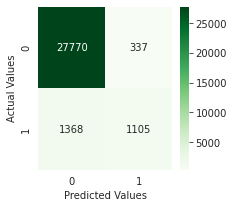

In [ ]:
ht_cb_clf= CatBoostClassifier(border_count = 32, depth = 8, iterations = 500, l2_leaf_reg = 5, learning_rate = 0.05, random_seed = 42)
ht_cb_clf.fit(X_train, y_train)
y_pred_cb_ht = ht_cb_clf.predict(X_test)

ev_cb_ht = cm_and_cr(y_pred_cb_ht)

**There is no impact of hyper parameter tuning on F1 Score. It indeed decreased the F1 score.** 

# **Get Important Features**

Text(0.5, 1.0, 'feature importance score')

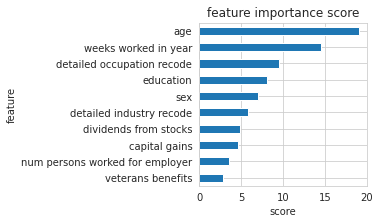

In [ ]:
feat_importances = pd.Series(cb_clf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

# **Predictions for Given Test Data**

Confusion matrix:
 [[71774   904]
 [ 3221  2965]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     72678
           1       0.77      0.48      0.59      6186

    accuracy                           0.95     78864
   macro avg       0.86      0.73      0.78     78864
weighted avg       0.94      0.95      0.94     78864



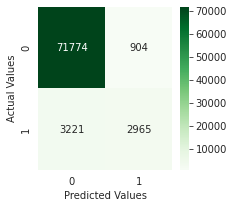

In [ ]:
#Creating a copy of test data
test= df_test.copy()

#Encoding Categorical Columns
CategoricalDataTest=test.select_dtypes(include=['object'])
for fea in CategoricalDataTest:
  test[fea] = le.fit_transform(test[fea].astype(str))

#Feature Selection
test.drop(columns= less_corr_cols[:-1], axis = 1, inplace= True)

#Separating Input and Output data
X = test[test.columns.difference(['income'])]
Y = test['income']

# Scaling input features
X = scaler.transform(X)

y_pred_test = cb_clf.predict(X)

ev_test = cm_and_cr(y_pred_test, Y)

